In [59]:
from torch import nn
import torch

D = 2 
input_size=120
hidden_size=180#output
hidden_layers=6
rnn = nn.LSTM(
    input_size, 
    hidden_size, 
    hidden_layers, 
    bidirectional=True, 
    batch_first=True)


In [61]:
BATCH = 1024
SEQUENCE_LEN = 11
H_in = 120
H_out = 180
xinput = torch.randn(BATCH, SEQUENCE_LEN, H_in)
h0 = torch.randn(D*hidden_layers, BATCH, H_out)
c0 = torch.randn(D*hidden_layers, BATCH, H_out)
output, (hn, cn) = rnn(xinput, (h0, c0))


In [63]:
rnn

LSTM(120, 180, num_layers=6, batch_first=True, bidirectional=True)

In [64]:
h0.shape

torch.Size([12, 1024, 180])

In [66]:
xinput[0,:,:]

tensor([[ 0.0727,  2.8804, -0.6679,  ..., -0.8574,  0.2585, -1.0985],
        [-0.5491,  0.5721, -0.3574,  ...,  2.0705, -1.0204, -0.0862],
        [-1.6051,  0.4100,  0.1098,  ...,  1.7047, -2.5729,  0.1866],
        ...,
        [-0.8232,  1.2983,  0.0170,  ..., -1.0645,  0.6556,  0.6533],
        [ 1.6065, -1.2789,  0.6784,  ...,  0.4022,  0.0217, -0.4855],
        [-0.0796, -0.0896, -0.4839,  ...,  0.9986, -0.4359,  0.2916]])

In [67]:
# N, L, D*H_out

In [51]:
output.shape

torch.Size([1024, 11, 360])

In [89]:
from torch import nn
import torch

class CustomLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(CustomLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(hidden_size*2, output_size)  # Linear layer to transform hidden state to output

    def forward(self, x):
        h0 = torch.randn(self.num_layers * 2, x.size(0), self.hidden_size)  # Initialize hidden state
        c0 = torch.randn(self.num_layers * 2, x.size(0), self.hidden_size)  # Initialize cell state
        output, _ = self.lstm(x, (h0, c0))  # LSTM output
        output = self.fc(output[:, -1, :])  # Apply linear layer to the last time step output
        return output


In [91]:
# Define LSTM parameters
input_size = 11
sequence_length = 120
hidden_size = 180
num_layers = 6
output_size = 180

# Create LSTM model
model = CustomLSTM(input_size, hidden_size, num_layers, output_size)

# Generate random input
xinput = torch.randn(1024, sequence_length, input_size)

# Forward pass
y_output = model(xinput)
print(y_output.shape)  # 

torch.Size([1024, 180])


In [92]:
import matplotlib.pyplot as plt

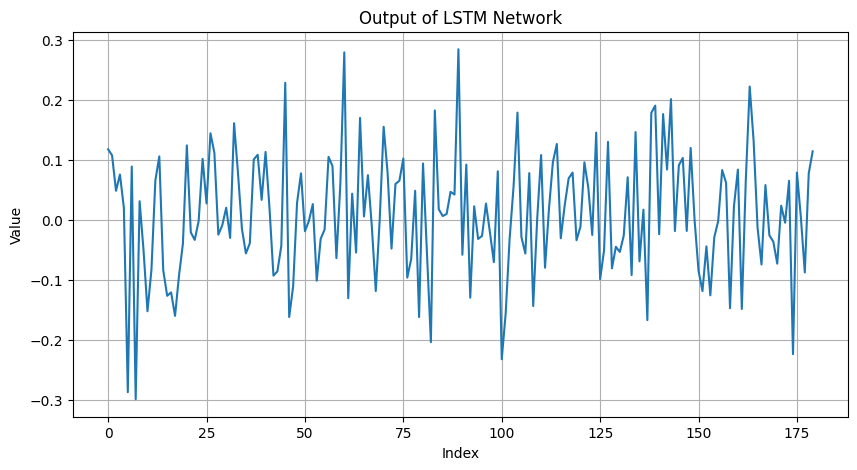

In [95]:

# Convert tensor to numpy array for plotting
y_output_np = y_output[1,:].detach().numpy()

# Plot the output
plt.figure(figsize=(10, 5))
plt.plot(y_output_np.flatten())
plt.title('Output of LSTM Network')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

RuntimeError: shape '[1024, 11, -1]' is invalid for input of size 184320

In [88]:
out.shape

torch.Size([1024, 11, 360])

In [68]:
# Example 2

In [69]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [70]:
lstm = nn.LSTM(3, 3)  # Input dim is 3, output dim is 3
inputs = [torch.randn(1, 3) for _ in range(5)]  # make a sequence of length 5

# initialize the hidden state.
hidden = (torch.randn(1, 1, 3),
          torch.randn(1, 1, 3))
for i in inputs:
    # Step through the sequence one element at a time.
    # after each step, hidden contains the hidden state.
    out, hidden = lstm(i.view(1, 1, -1), hidden)

# alternatively, we can do the entire sequence all at once.
# the first value returned by LSTM is all of the hidden states throughout
# the sequence. the second is just the most recent hidden state
# (compare the last slice of "out" with "hidden" below, they are the same)
# The reason for this is that:
# "out" will give you access to all hidden states in the sequence
# "hidden" will allow you to continue the sequence and backpropagate,
# by passing it as an argument  to the lstm at a later time
# Add the extra 2nd dimension
inputs = torch.cat(inputs).view(len(inputs), 1, -1)
hidden = (torch.randn(1, 1, 3), torch.randn(1, 1, 3))  # clean out hidden state
out, hidden = lstm(inputs, hidden)
print(out)
print(hidden)

tensor([[[-0.0187,  0.1713, -0.2944]],

        [[-0.3521,  0.1026, -0.2971]],

        [[-0.3191,  0.0781, -0.1957]],

        [[-0.1634,  0.0941, -0.1637]],

        [[-0.3368,  0.0959, -0.0538]]], grad_fn=<MkldnnRnnLayerBackward0>)
(tensor([[[-0.3368,  0.0959, -0.0538]]], grad_fn=<StackBackward0>), tensor([[[-0.9825,  0.4715, -0.0633]]], grad_fn=<StackBackward0>))


In [71]:
out.shape

torch.Size([5, 1, 3])